In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #chuyển InvoiceDate thành datetime object
d1 = df[['InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']] #lấy các cột dữ liệu cần thiết
d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
d1 = d1.set_index(['InvoiceDate']) #chuyển mỗi giá trị InvoiceDate thành index của mỗi để search theo index
d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.month).sum() #tính tổng doanh thu theo tháng

d4 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first') # xóa bỏ các dòng trùng lặp của cùng một đơn hàng
d4 = d4['2011']
d4 = d4.reset_index()
d5 = d4.groupby(by=d4['InvoiceDate'].dt.month).count() #đếm tổng số đơn hàng trong tháng


/tmp/ipykernel_6285/919673577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
/tmp/ipykernel_6285/919673577.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
/tmp/ipykernel_6285/919673577.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d3 = d2.groupby

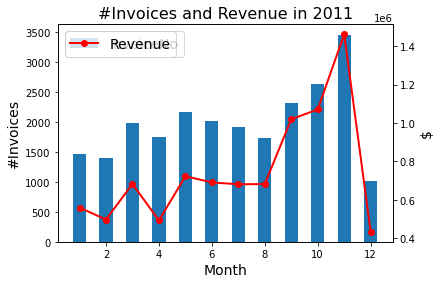

In [6]:
x = d5.index.get_level_values(0)
plt.bar(x, d5['InvoiceNo'], width = 0.5, label = 'InvoiceNo')
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, d3['Revenue'], label = 'Revenue', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Month', fontsize = 14)
axes1.set_ylabel('#Invoices', fontsize = 14)
axes2.set_ylabel('$', fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title('#Invoices and Revenue in 2011', fontsize = 16)
plt.show()